## Ejercicios con Seaborn

### Tratamiento de datos Nulos

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic=sns.load_dataset("titanic")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
titanic['embarked']=titanic['embarked'].fillna('Unkown')
titanic['embark_town']=titanic['embark_town'].fillna('Unkown')

In [7]:
titanic['deck'] = titanic['deck'].cat.add_categories('Unkown')
titanic['deck']=titanic['deck'].fillna('Unkown')

In [8]:
titanic2=titanic.copy()
titanic2['age']=titanic2['age'].fillna(titanic2['age'].median())

In [9]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unkown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unkown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unkown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Unkown,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Unkown,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

#### 1. Representa mediante un histograma (utilizando sns.distplot) la tarifa pagada por los pasajeros (fare). Utiliza 20 bins y muestra dos gráficas, una con la estimación de la probabilidad y otra sin ella.
- Para crear dos ejes dentro de un gráfico deberás hacer uso de matplotlib.


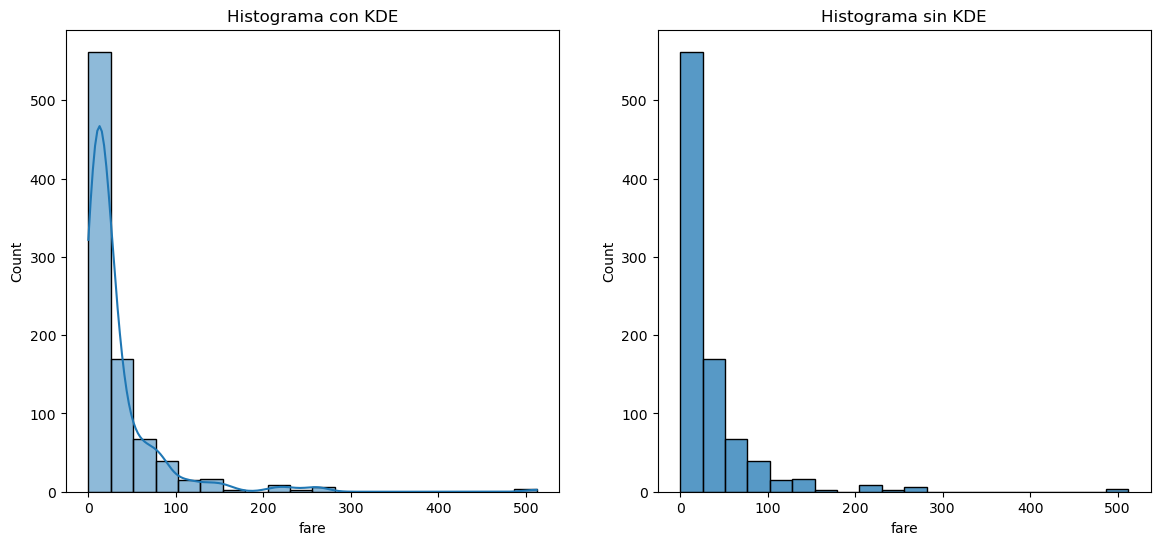

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
#Histograma con KDE (estimación de la probabilidad)
sns.histplot(titanic['fare'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histograma con KDE')

#Histograma sin KDE
sns.histplot(titanic['fare'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('Histograma sin KDE')
plt.show()

#### 2. Representa la distribución de edades de los pasajeros con un histograma (utilizando sns.kdeplot). Incluye el parámetro hue para diferenciar por la variable sex.

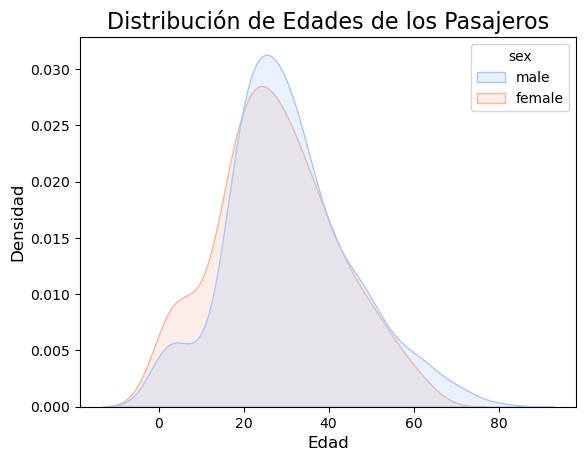

In [12]:
sns.kdeplot(data=titanic, x='age', hue='sex', fill=True, common_norm=False, palette='coolwarm')

#título y etiquetas
plt.title('Distribución de Edades de los Pasajeros', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

plt.show()

#### 3. Representa la relación entre tarifa y edad.
- Usa un diagrama de dispersión con sns.scatterplot.
- Incluye el parámetro hue para diferenciar por survived y size para escalar los puntos según la cantidad de hermanos/esposos (sibsp).


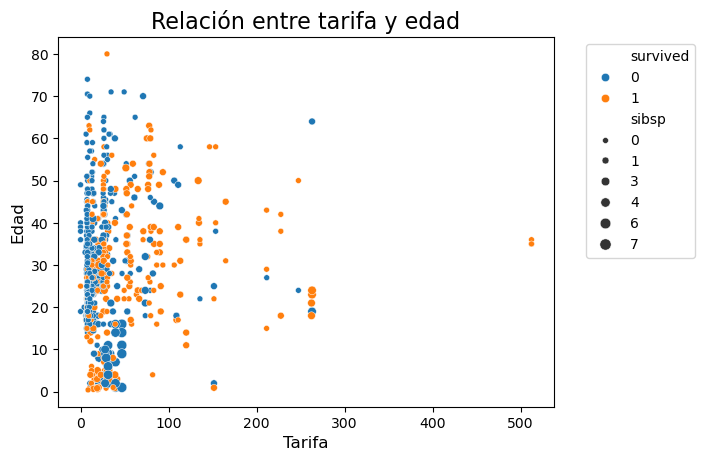

In [13]:
sns.scatterplot(titanic, x='fare', y='age', hue='survived', size='sibsp')
#título y etiquetas
plt.title('Relación entre tarifa y edad', fontsize=16)
plt.xlabel('Tarifa', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

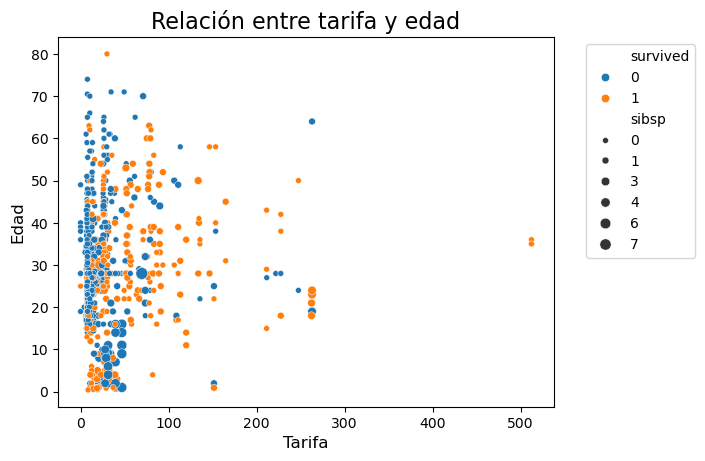

In [14]:
#En este caso
sns.scatterplot(titanic2, x='fare', y='age', hue='survived', size='sibsp')
#título y etiquetas
plt.title('Relación entre tarifa y edad', fontsize=16)
plt.xlabel('Tarifa', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 4. Representa la distribución de todas las combinaciones binarias de columnas con sns.pairplot.

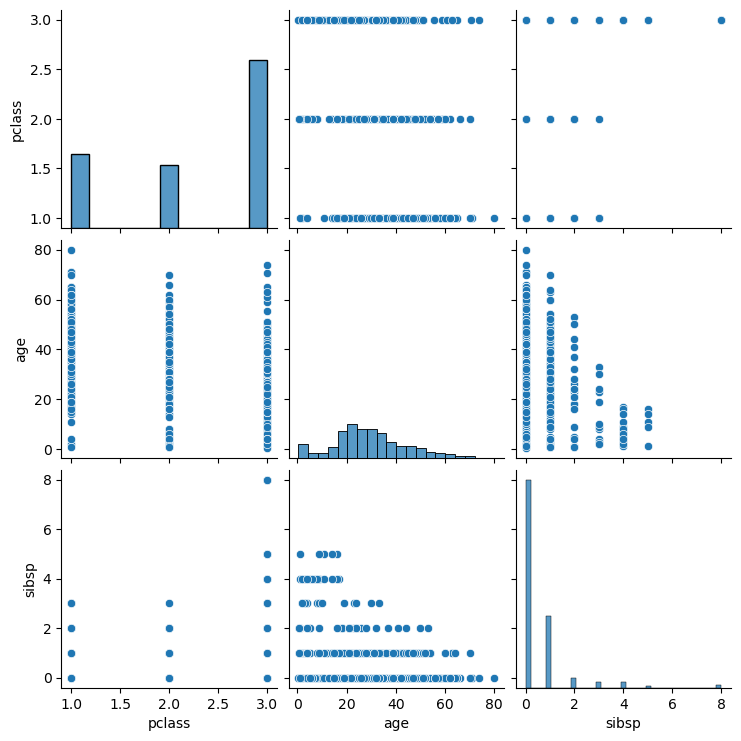

In [15]:
sns.pairplot(titanic.iloc[:,1:5])

In [16]:
titanic_num = titanic.select_dtypes(include=['number'])
titanic_num

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


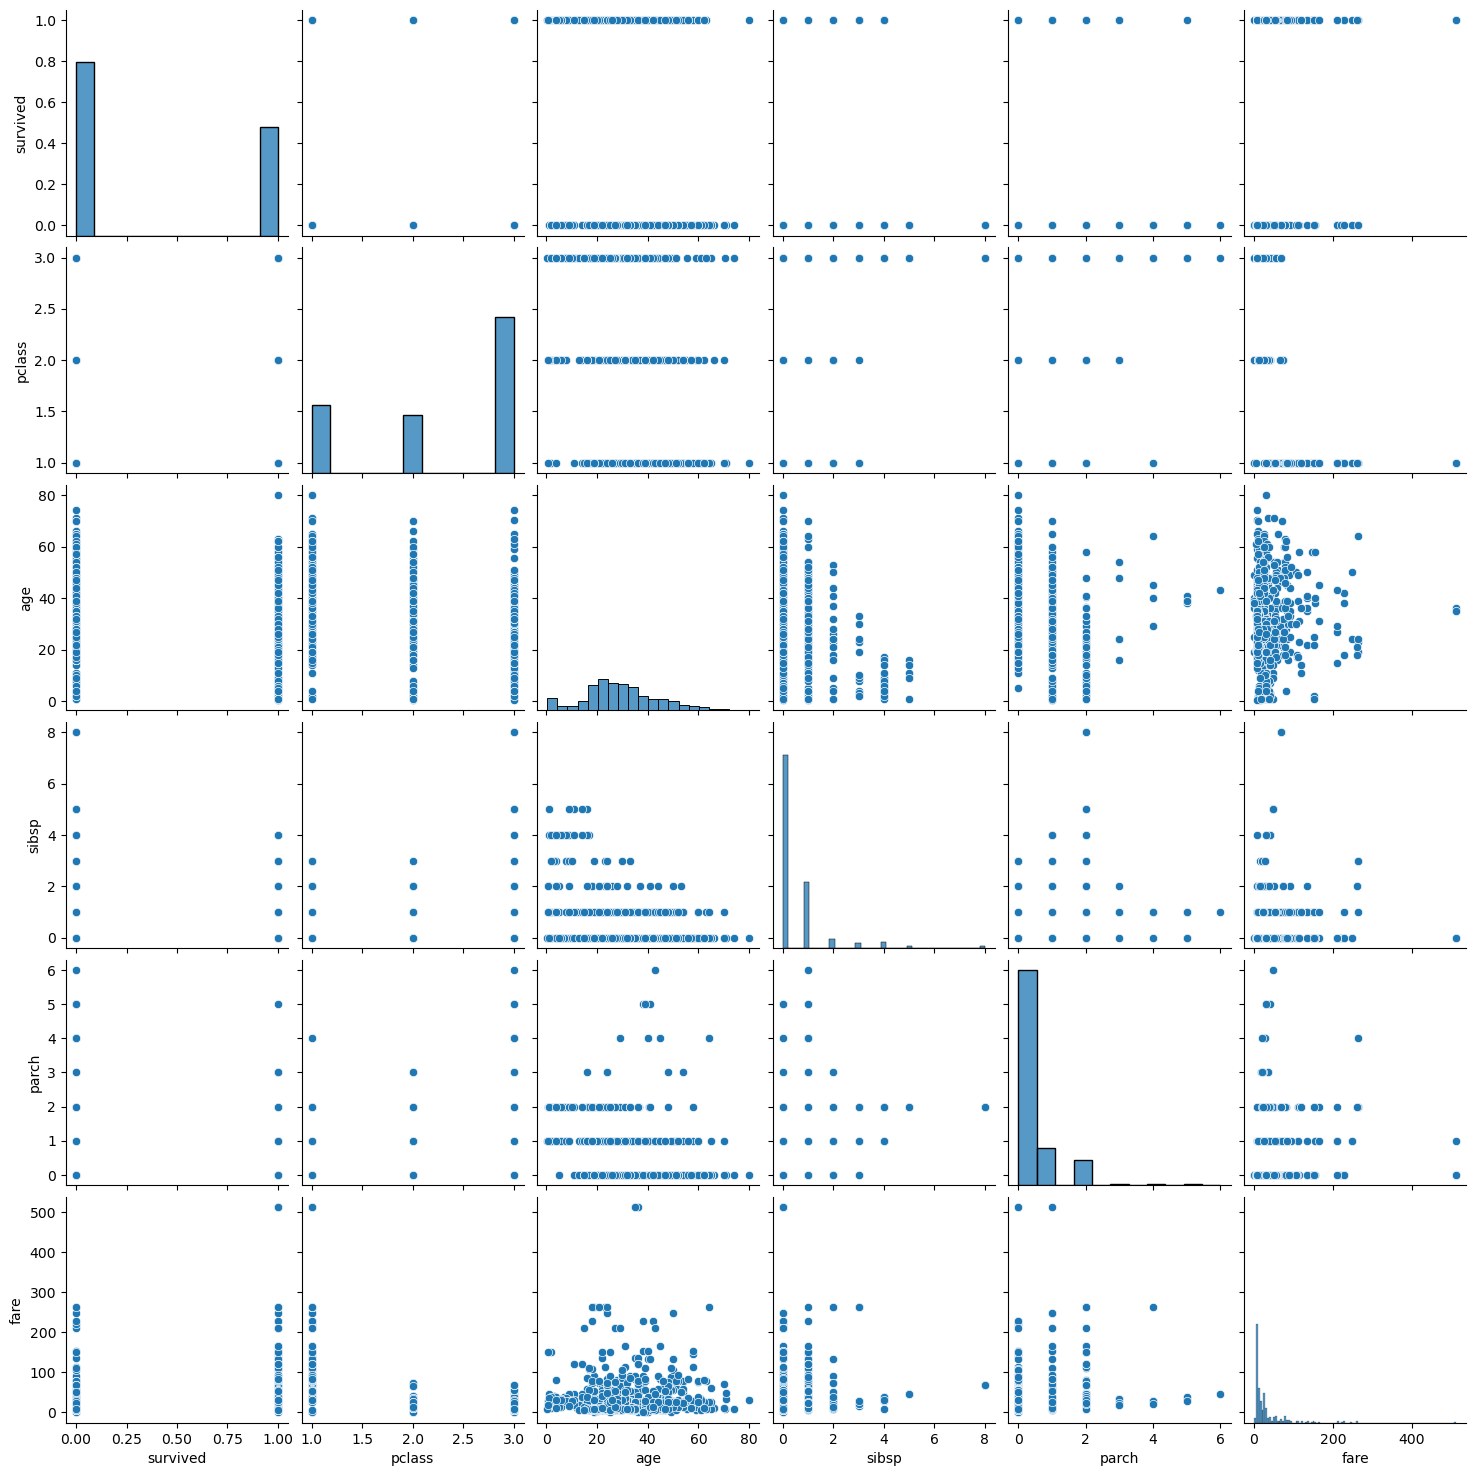

In [17]:
sns.pairplot(titanic_num)

#### 5. Representa las correlaciones del dataset con un mapa de calor usando sns.heatmap.
- Ten en cuenta que la correlación sólo puede trabajar con valores numéricos.


<Axes: >

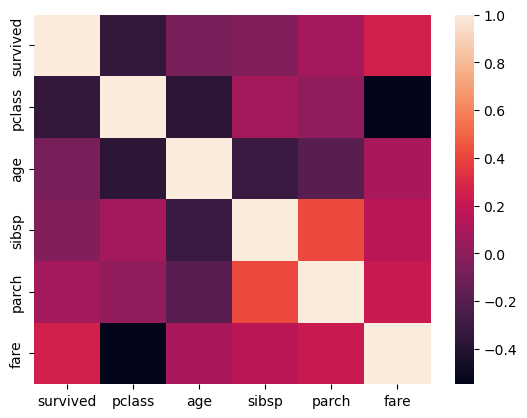

In [18]:
import pandas as pd
corr=titanic_num.corr()
sns.heatmap(corr)

In [19]:
titanic['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

#### 6. Representa la relación entre relación entre tarifa (fare), edad (age), clase (pclass) y tipo de persona (who).
- Usa sns.relplot con las variables seleccionadas.
- Usa el parámetro hue para diferenciar por survived.
- Usa los facets para diferenciar por tipo de persona (who).


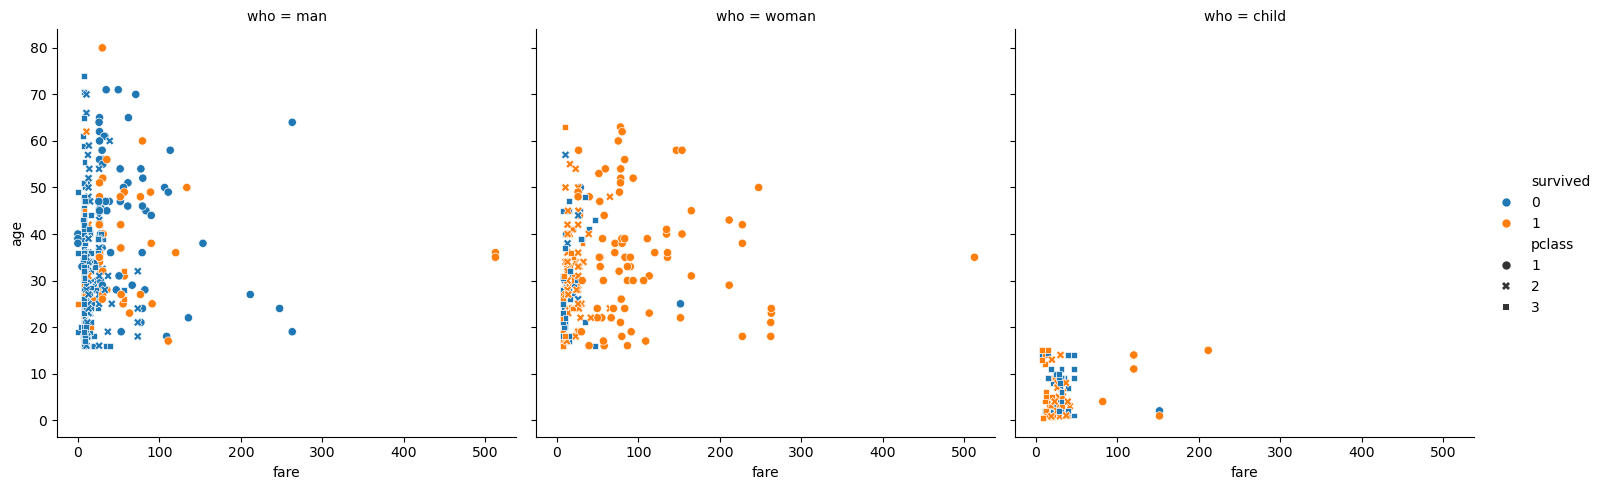

In [20]:
sns.relplot(data=titanic, x='fare', y='age', col='who', hue='survived', style='pclass')
#los facets por tipo de persona se hacen con col o raw
plt.show()

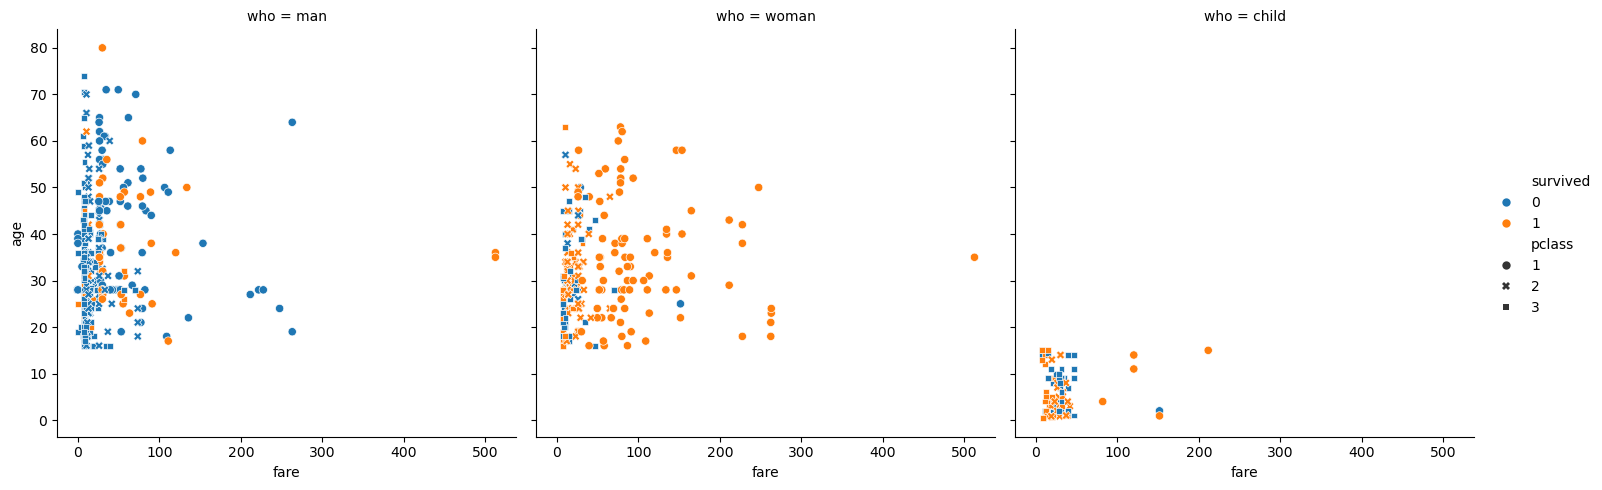

In [21]:
#datos mostrados con la columna age tratada(sustituir los nulos por la mediana(28))
sns.relplot(data=titanic2, x='fare', y='age', col='who', hue='survived', style='pclass')
#los facets por tipo de persona se hacen con col o raw
plt.show()

#### 7. Representa las relación entre tarifa y edad con un sns.jointplot.
Usa el tipo kde para visualizar las densidades conjuntas y marginales.


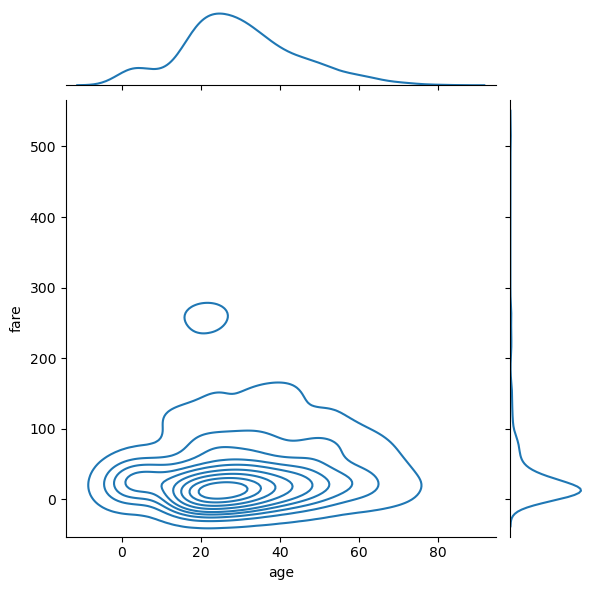

In [22]:
#Representación con datos sin tratar la columna de edad(con algunos nulos)
sns.jointplot(titanic, x='age', y='fare', kind='kde')
plt.show()

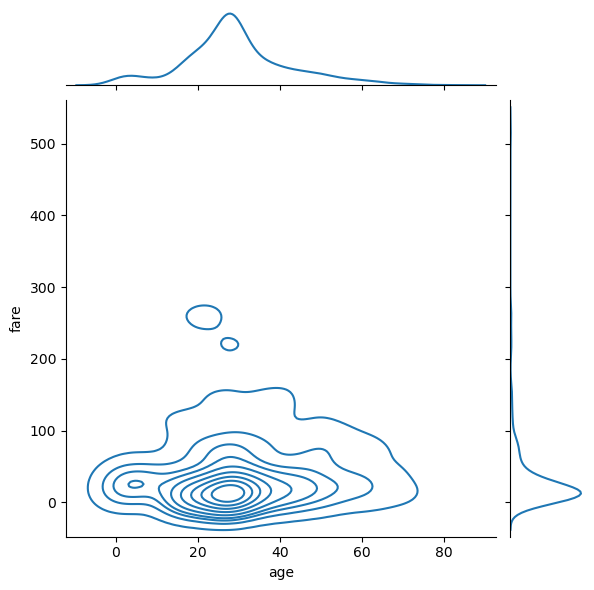

In [23]:
#Representación después de tratar la columna age(mediana de las edades(28) a todas las que tenian null)
sns.jointplot(titanic2, x='age', y='fare', kind='kde')
plt.show()

#### Conclusión:
- Con el tratamiento de datos en el campo de edad vemos que mas del 20% de los valores que teniamos como nulos los hemos sustituidos por 28, lo que se puede ver en la segunda gráfica de este ejercicio donde se ve este valor más marcado, en cambio en la primera vemos que esa curva es mas prolongada porque abarca mas valores de edad, las tarifas no cambiarían.

#### 8. Representa la edad en función de la clase (pclass)  usando sns.catplot.
- Usa hue para diferenciar por sex.
- Usa los facets para diferenciar por puerto de embarque (embark_town) y si sobrevivio (suvirved).


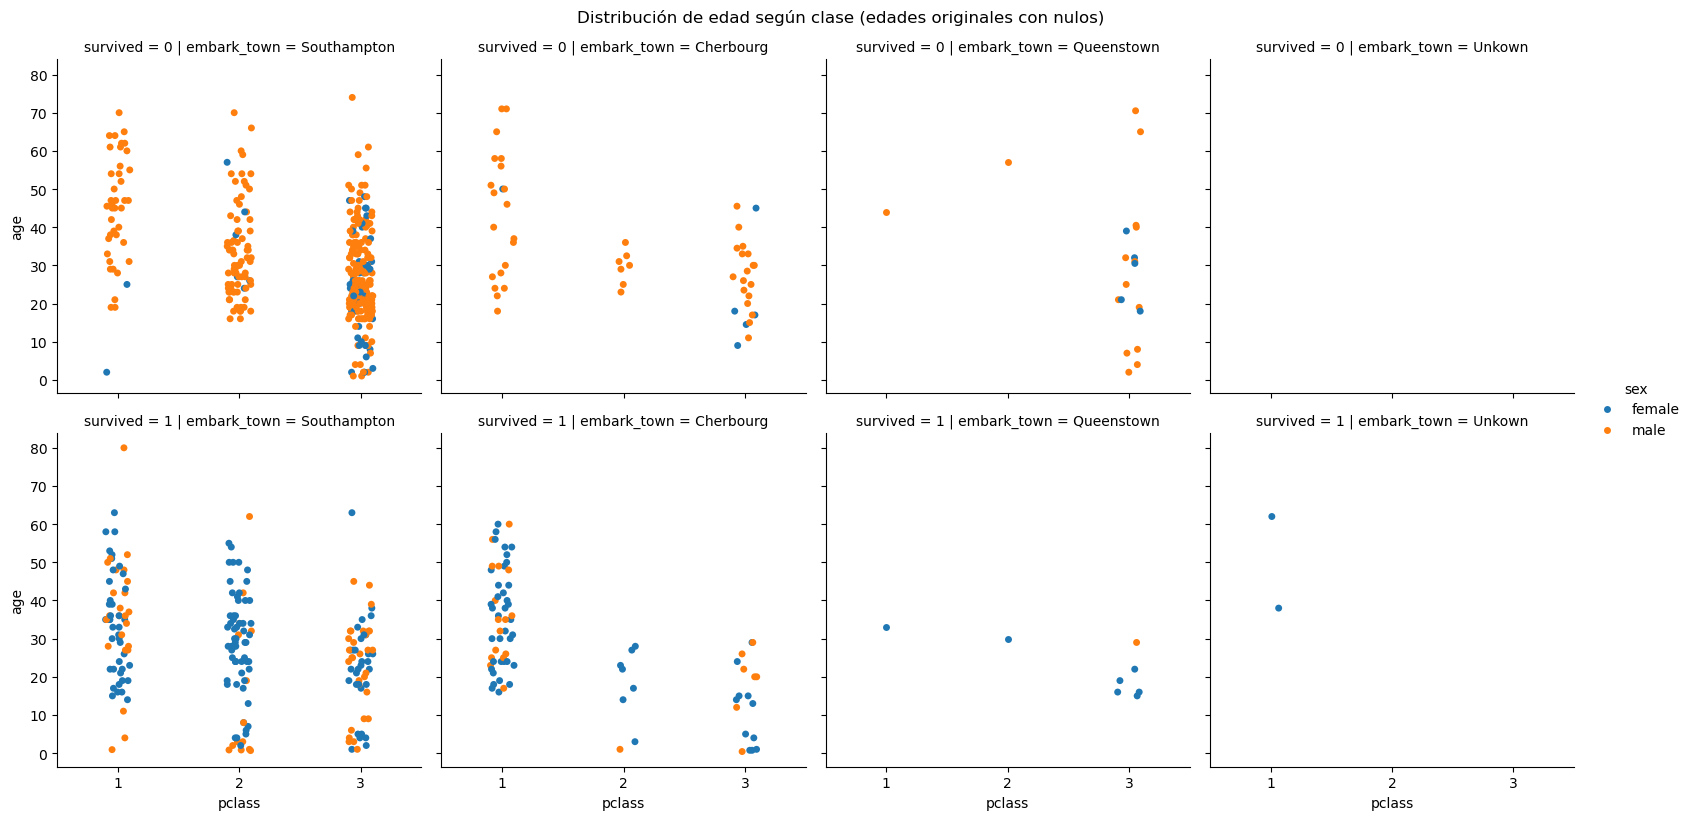

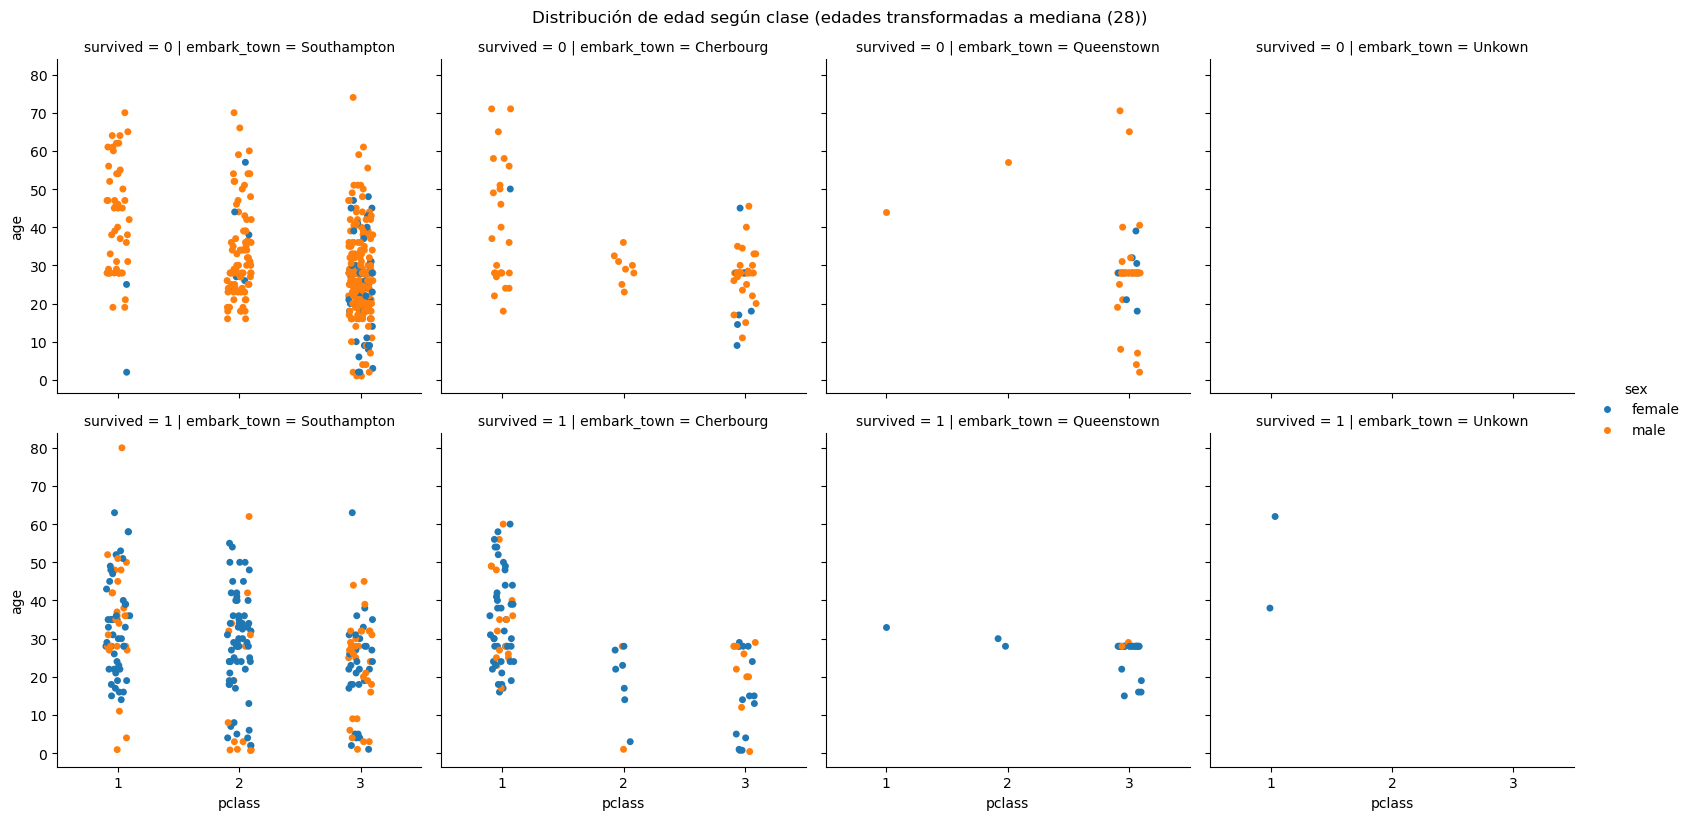

In [24]:
# visualización con el dataframe original (titanic)
plot_original = sns.catplot(
    data=titanic,
    x="pclass",
    y="age",
    hue="sex",
    col="embark_town",
    row="survived",
    kind="strip",
    height=4,
    aspect=1
)
plot_original.figure.suptitle("Distribución de edad según clase (edades originales con nulos)", y=1.02)

# visualización con el dataframe transformado (titanic2)
plot_transformed = sns.catplot(
    data=titanic2,
    x="pclass",
    y="age",
    hue="sex",
    col="embark_town",
    row="survived",
    kind="strip",
    height=4,
    aspect=1
)
plot_transformed.fig.suptitle("Distribución de edad según clase (edades transformadas a mediana (28))", y=1.02)

plt.show()


#### Con los datos originales, hay vacíos en las gráficas porque las edades nulas no se representan, lo que deja algunas categorías incompletas. Al usar los datos transformados, esos vacíos desaparecen, pero se nota una acumulación de edades en 28 años, que no refleja la realidad. 

#### 9. Representa el cambio promedio de las tarifas (fare) según la clase utilizando un intervalo de confianza del 90%.
- Usa sns.lineplot para mostrar la relación promedio entre pclass y fare.
- Diferencia por sex con el parámetro hue.

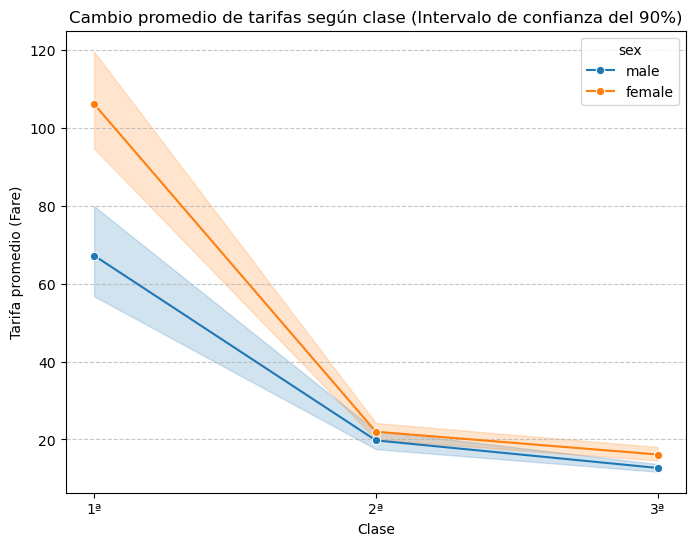

In [25]:
#cambio promedio de las tarifas según la clase con intervalo de confianza del 90%
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=titanic,
    x="pclass",
    y="fare",
    hue="sex",
    errorbar=('ci', 90),
    marker="o"
)
plt.title("Cambio promedio de tarifas según clase (Intervalo de confianza del 90%)")
plt.xlabel("Clase")
plt.ylabel("Tarifa promedio (Fare)")
plt.xticks([1, 2, 3], ["1ª", "2ª", "3ª"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 10. Utiliza un diagrama de dispersión categórico para comparar la distribución de tarifas (fare) entre clases (pclass).
- Usa sns.stripplot y sns.swarmplot y elige el que mejor transmita la información.
- Usa hue para diferenciar por tipo de persona (who).


/home/alumnadotarde/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/alumnadotarde/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/alumnadotarde/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/alumnadotarde/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/alumnadotarde/anaconda3/lib/python

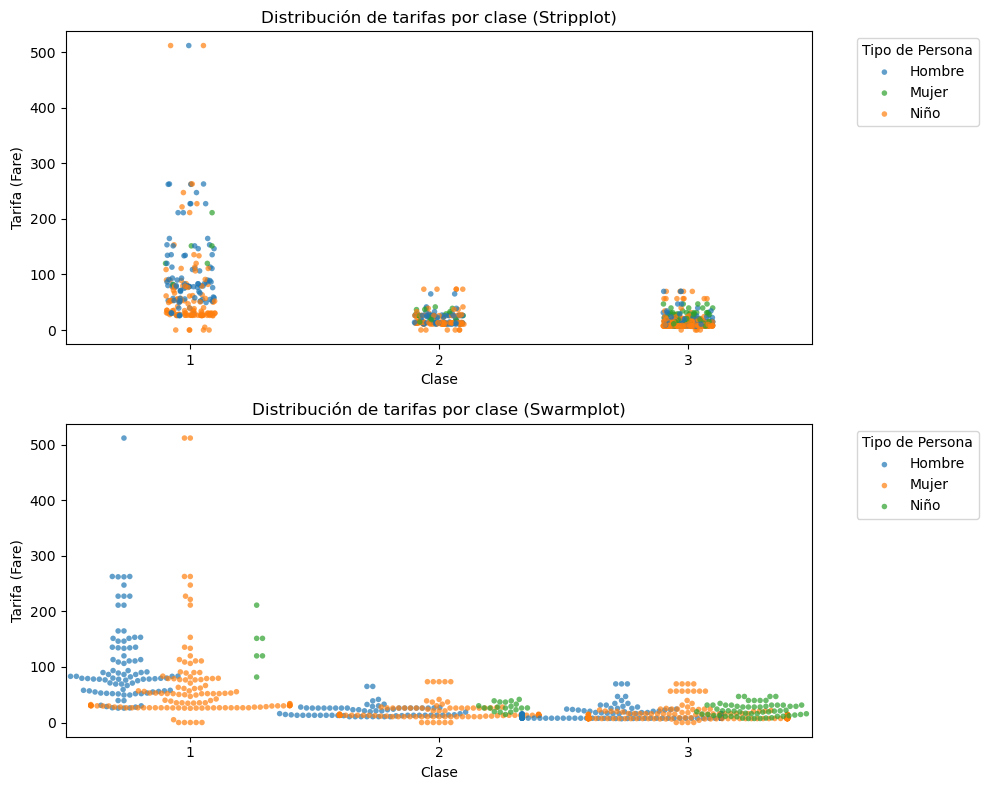

In [26]:
plt.figure(figsize=(10,8))
# Stripplot
plt.subplot(2, 1, 1)
sns.stripplot(
    data=titanic,
    x="pclass",
    y="fare",
    hue="who",
    jitter=True,
    alpha=0.7,
    size=4  # Ajusta el tamaño de los puntos, para que se puedan dibujar todos y no salte el warning
)
plt.title("Distribución de tarifas por clase (Stripplot)")
plt.xlabel("Clase")
plt.ylabel("Tarifa (Fare)")
plt.legend(title="Tipo de Persona", labels=["Hombre", "Mujer", "Niño"], bbox_to_anchor=(1.05, 1), loc='upper left')

# Swarmplot
plt.subplot(2, 1, 2)
sns.swarmplot(
    data=titanic,
    x="pclass",
    y="fare",
    hue="who",
    dodge=True,
    alpha=0.7,
    size=4
)
plt.title("Distribución de tarifas por clase (Swarmplot)")
plt.xlabel("Clase")
plt.ylabel("Tarifa (Fare)")
plt.legend(title="Tipo de Persona", labels=["Hombre", "Mujer", "Niño"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Para que no salten los warning vamos a usar stripplot separando ambas gráficas y bajando el size de la del swarmplot

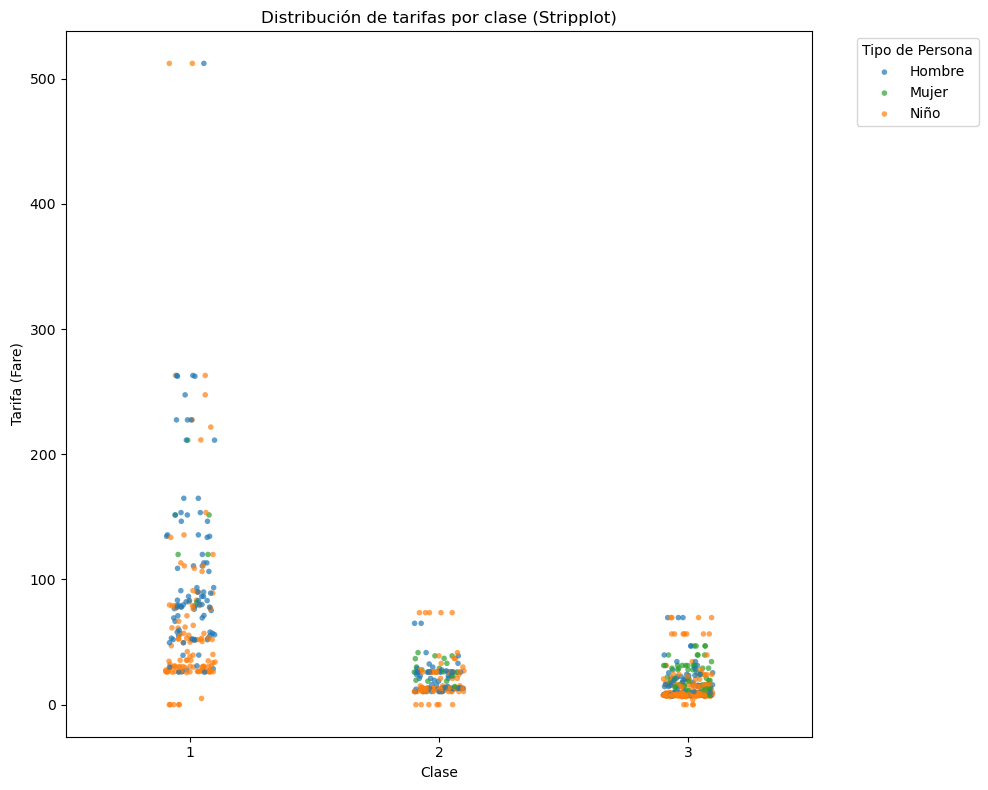

/home/alumnadotarde/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/alumnadotarde/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


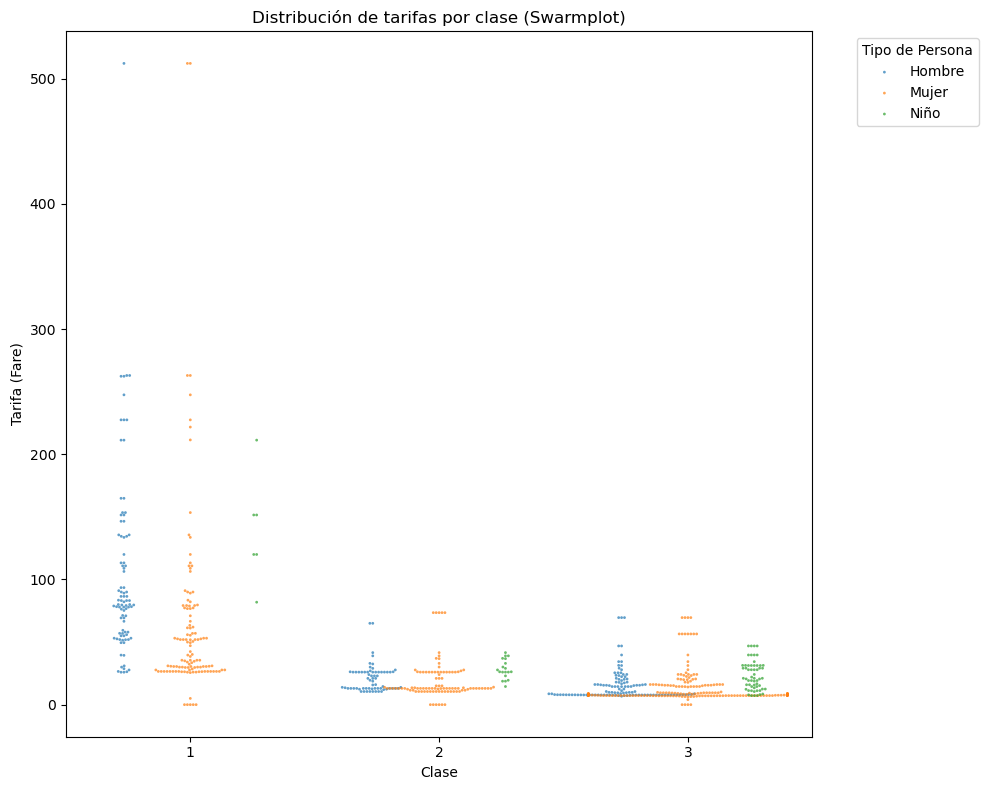

In [27]:
plt.figure(figsize=(10, 8))

# Stripplot
sns.stripplot(
    data=titanic,
    x="pclass",
    y="fare",
    hue="who",
    jitter=True,
    alpha=0.7,
    size=4  # Ajusta el tamaño de los puntos para evitar el solapamiento
)
plt.title("Distribución de tarifas por clase (Stripplot)")
plt.xlabel("Clase")
plt.ylabel("Tarifa (Fare)")
plt.legend(title="Tipo de Persona", labels=["Hombre", "Mujer", "Niño"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))

# Swarmplot
sns.swarmplot(
    data=titanic,
    x="pclass",
    y="fare",
    hue="who",
    dodge=True,
    alpha=0.7,
    size=2  # Ajusta el tamaño de los puntos para evitar solapamientos
)
plt.title("Distribución de tarifas por clase (Swarmplot)")
plt.xlabel("Clase")
plt.ylabel("Tarifa (Fare)")
plt.legend(title="Tipo de Persona", labels=["Hombre", "Mujer", "Niño"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 11. Representa la distribución de edades según clase y supervivencia.
- Usa sns.catplot para mostrar la distribución de edades con un diagrama de caja y bigotes.
- Diferencia por survived con el parámetro hue.
- Utiliza los facets para diferenciar por sexo (sex) y tipo de persona(who)

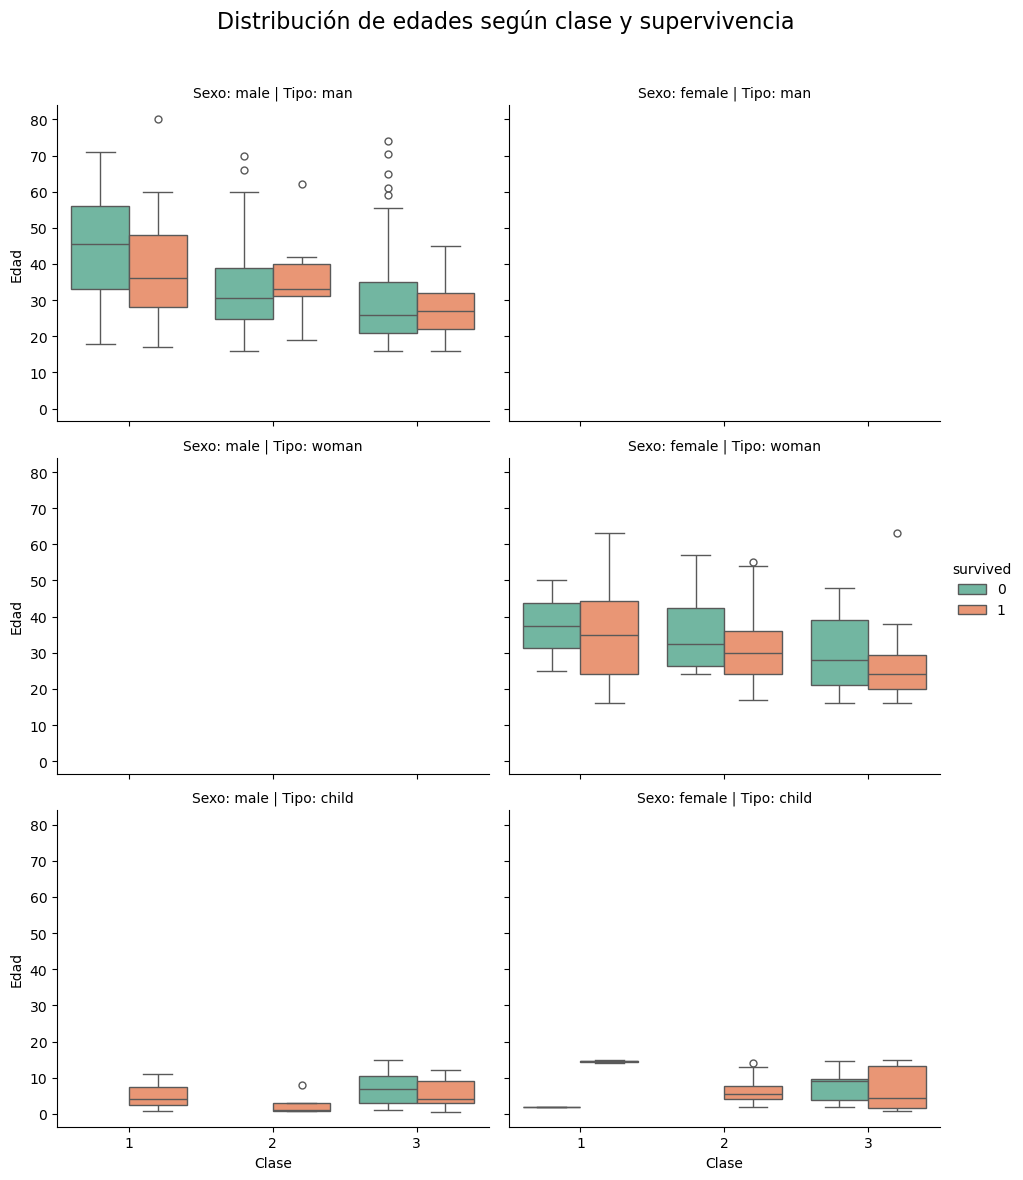

In [29]:
#gráfico con sns.catplot
catplot = sns.catplot(
    data=titanic,
    x="pclass",
    y="age",
    hue="survived",
    col="sex",
    row="who",
    kind="box",
    height=4,
    aspect=1.2,
    palette="Set2"  # Paleta de colores para una mejor diferenciación
)

# etiquetas y título
catplot.figure.subplots_adjust(top=0.9)  # Ajusta el espacio para el título
catplot.figure.suptitle("Distribución de edades según clase y supervivencia", fontsize=16)
catplot.set_axis_labels("Clase", "Edad")
catplot.set_titles("Sexo: {col_name} | Tipo: {row_name}")

plt.show()

#### 12. Utiliza un diagrama de violín para mostrar las tarifas según clase y sexo.
- Agrega split=True para superponer los datos masculinos y femeninos dentro de cada clase.


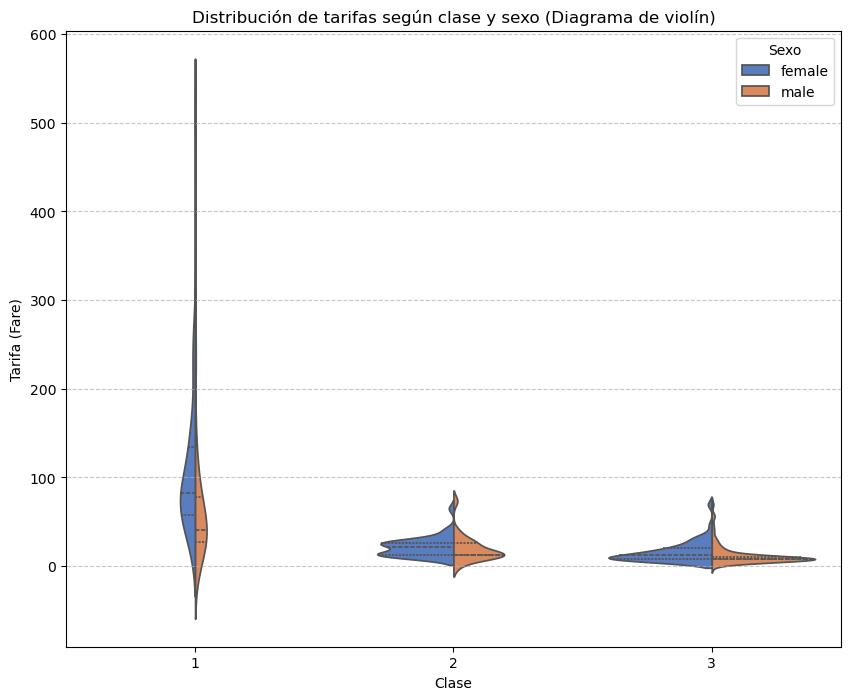

In [30]:
plt.figure(figsize=(10, 8))
sns.violinplot(
    data=titanic,
    x="pclass",
    y="fare",
    hue="sex",
    split=True,  # Superpone los datos de hombres y mujeres
    inner="quartile",  # Muestra las líneas de los cuartiles dentro del violín
    palette="muted"  # Paleta de colores más suave
)

# Personalización del gráfico
plt.title("Distribución de tarifas según clase y sexo (Diagrama de violín)")
plt.xlabel("Clase")
plt.ylabel("Tarifa (Fare)")
plt.legend(title="Sexo", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de referencia horizontales
plt.show()


#### 13. Representa el porcentaje de supervivencia por clase y sexo utilizando un diagrama de barras.
- Utiliza los facets para diferenciar por categoría de edad (valores de edad agrupados de 10 en 10). Mostrando como mucho 3 columnas y tantas filas necesites.


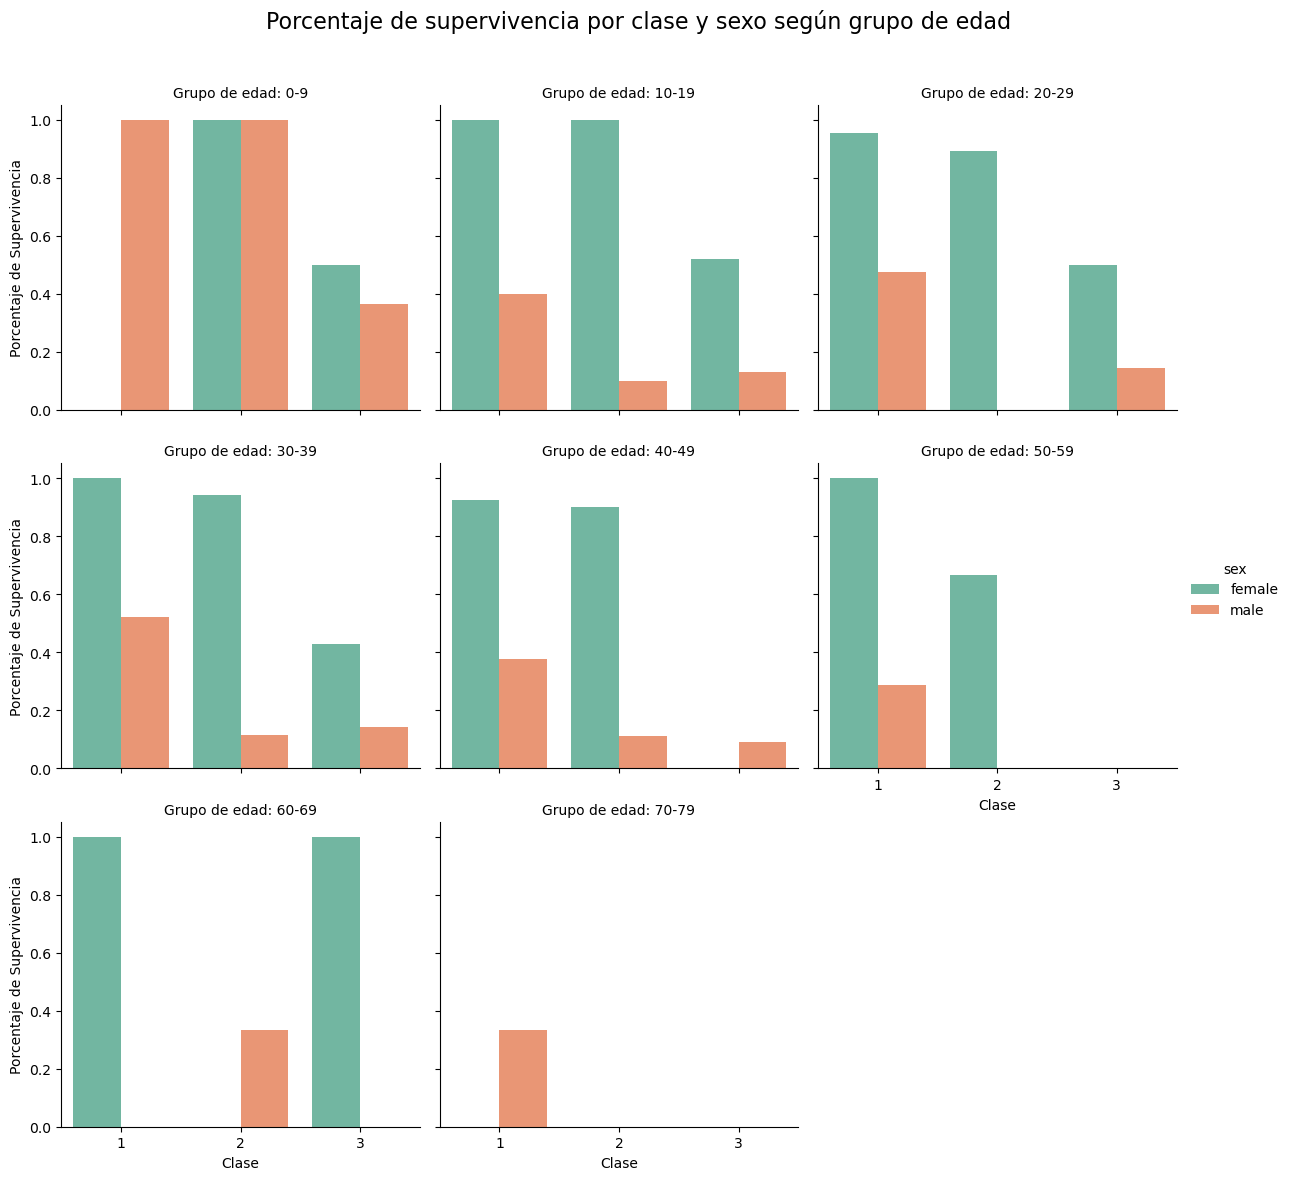

In [32]:
#nueva columna para agrupar las edades en intervalos de 10 años
titanic['age_group'] = pd.cut(
    titanic['age'], 
    bins=range(0, 81, 10),  # Rango de 0 a 80 años, en intervalos de 10
    labels=[f"{i}-{i+9}" for i in range(0, 80, 10)]
)

# Configurar el gráfico
g = sns.catplot(
    data=titanic,
    x="pclass",
    hue="sex",
    y="survived",
    col="age_group",
    kind="bar",
    height=4, 
    aspect=1,
    col_wrap=3,  # Máximo 3 columnas
    palette="Set2",  # Paleta de colores
    errorbar=None  # No mostrar intervalo de confianza
)

# Personalizar el gráfico
g.figure.subplots_adjust(top=0.9)  # Espacio para el título principal
g.figure.suptitle("Porcentaje de supervivencia por clase y sexo según grupo de edad", fontsize=16)
g.set_axis_labels("Clase", "Porcentaje de Supervivencia")
g.set_titles("Grupo de edad: {col_name}")

plt.show()

#### si lo hacemos con titanic2 que contiene las edades en null=28, pasará lo siguiente:

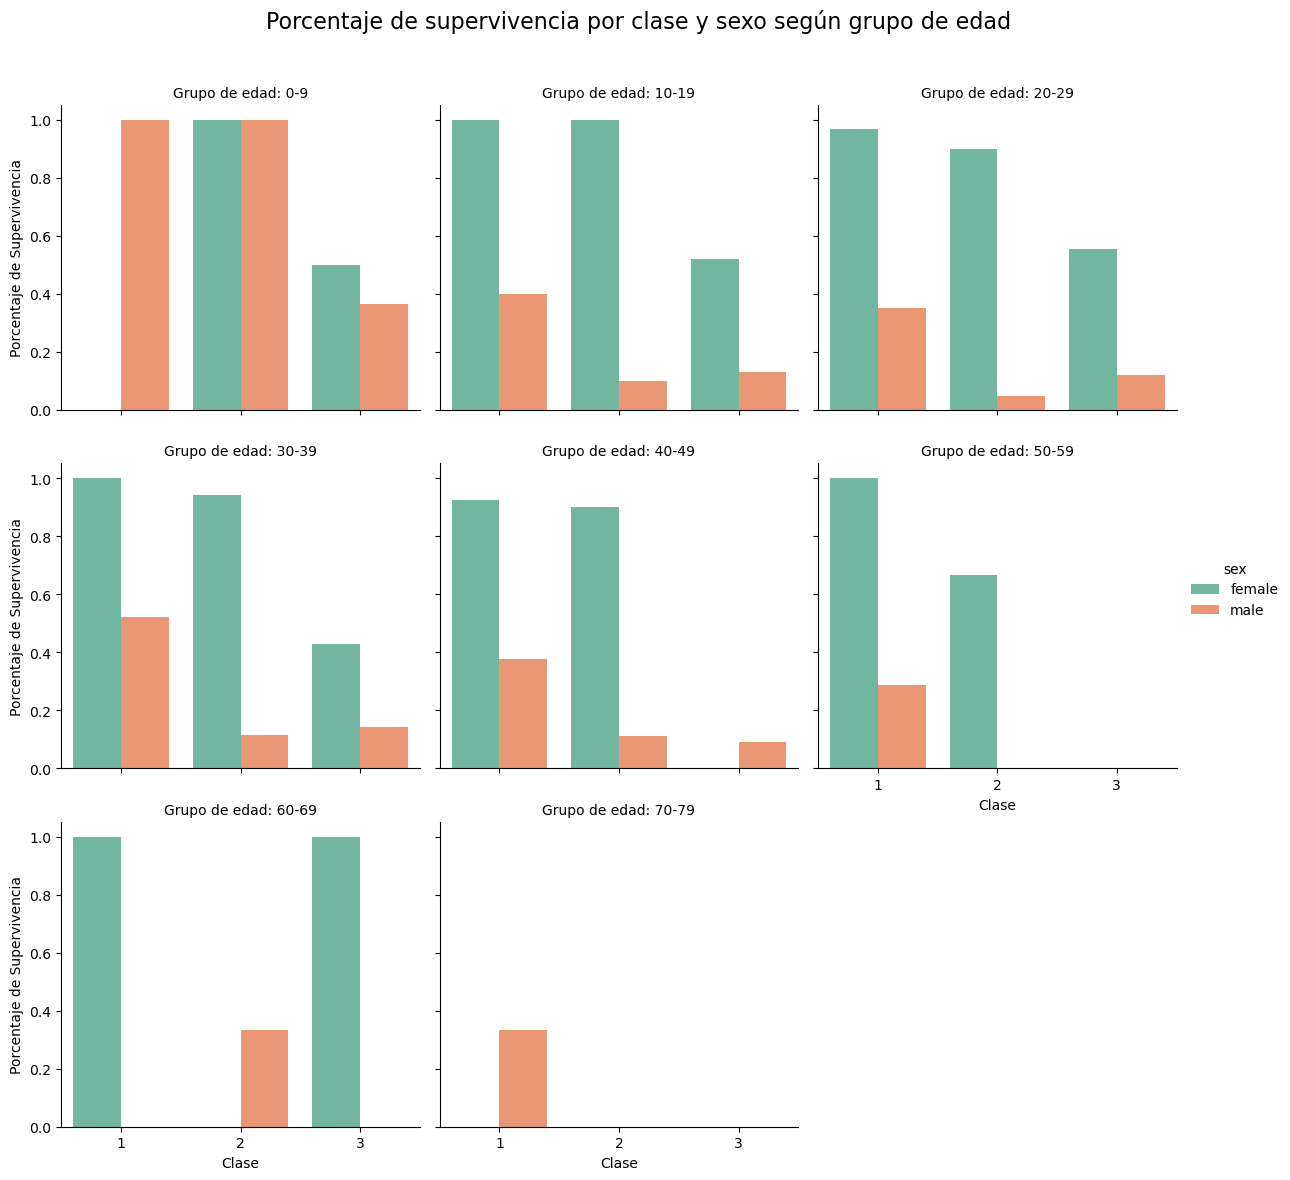

In [34]:
#nueva columna para agrupar las edades en intervalos de 10 años
titanic2['age_group'] = pd.cut(
    titanic2['age'], 
    bins=range(0, 81, 10),  # Rango de 0 a 80 años, en intervalos de 10
    labels=[f"{i}-{i+9}" for i in range(0, 80, 10)]
)

# Configurar el gráfico
g = sns.catplot(
    data=titanic2,
    x="pclass",
    hue="sex",
    y="survived",
    col="age_group",
    kind="bar",
    height=4, 
    aspect=1,
    col_wrap=3,  # Máximo 3 columnas
    palette="Set2",  # Paleta de colores
    errorbar=None  # No mostrar intervalo de confianza
)

# Personalizar el gráfico
g.figure.subplots_adjust(top=0.9)  # Espacio para el título principal
g.figure.suptitle("Porcentaje de supervivencia por clase y sexo según grupo de edad", fontsize=16)
g.set_axis_labels("Clase", "Porcentaje de Supervivencia")
g.set_titles("Grupo de edad: {col_name}")

plt.show()

#### la representación no varía mucho, porque estamos dividiendo por grupo y el grupo de la edad de 28 años solo afecta a la tercera gráfica.

#### 14. Representa una línea de regresión entre la tarifa y la edad.


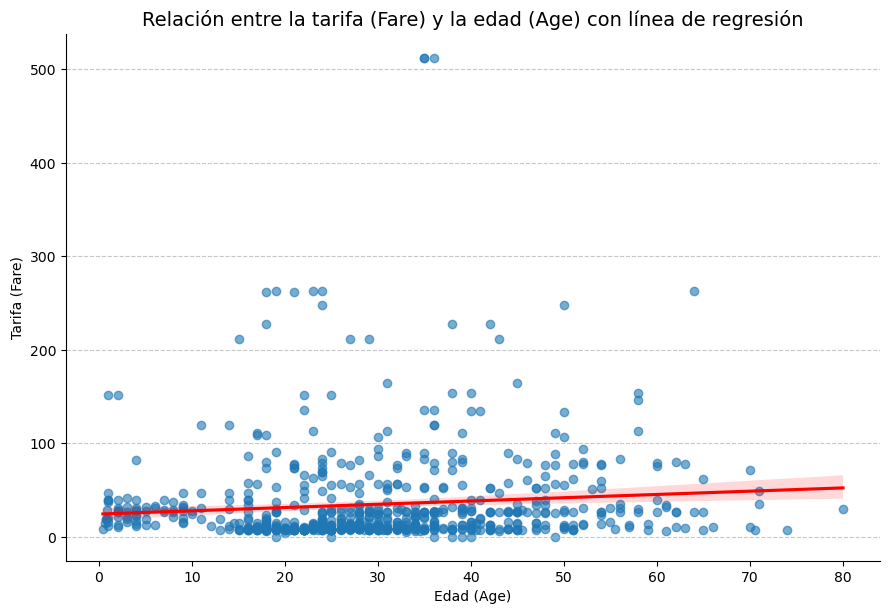

In [35]:
#gráfico de regresión
sns.lmplot(
    data=titanic,
    x="age",
    y="fare",
    height=6,
    aspect=1.5,
    scatter_kws={"alpha": 0.6},  # Transparencia para los puntos
    line_kws={"color": "red"},  # Color de la línea de regresión
    ci=95  # Intervalo de confianza del 95%
)

# Personalización del gráfico
plt.title("Relación entre la tarifa (Fare) y la edad (Age) con línea de regresión", fontsize=14)
plt.xlabel("Edad (Age)")
plt.ylabel("Tarifa (Fare)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### con el dataset de titanic2:

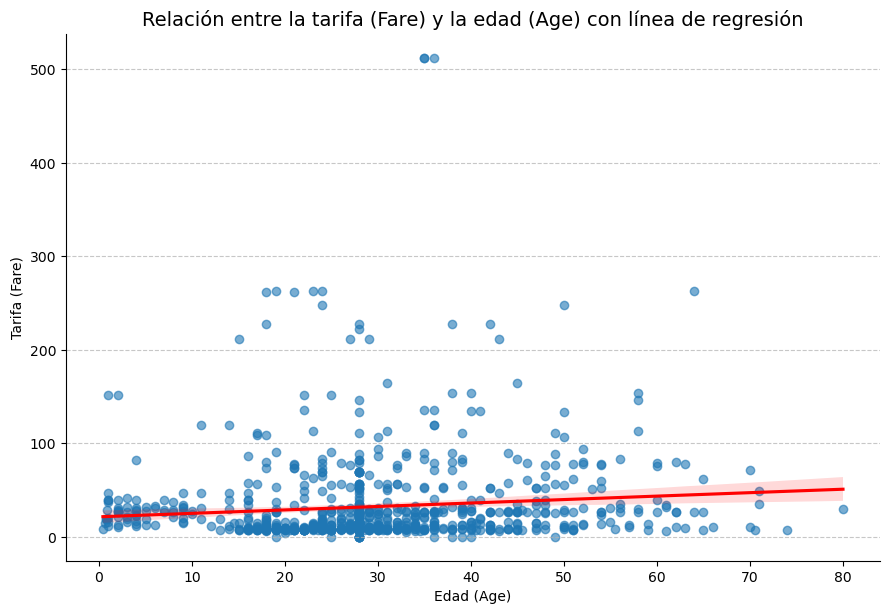

In [39]:
# Crear el gráfico de regresión
sns.lmplot(
    data=titanic2,
    x="age",
    y="fare",
    height=6,
    aspect=1.5,
    scatter_kws={"alpha": 0.6},  # Transparencia para los puntos
    line_kws={"color": "red"},  # Color de la línea de regresión
    ci=95  # Intervalo de confianza del 95%
)

# Personalización del gráfico
plt.title("Relación entre la tarifa (Fare) y la edad (Age) con línea de regresión", fontsize=14)
plt.xlabel("Edad (Age)")
plt.ylabel("Tarifa (Fare)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### la línea de regresión no varía mucho pero se ven mucho más puntos a al altura de 28 en la Edad

#### 15. Representa una línea de regresión entre la tarifa y la edad segmentando por sexo y clase.

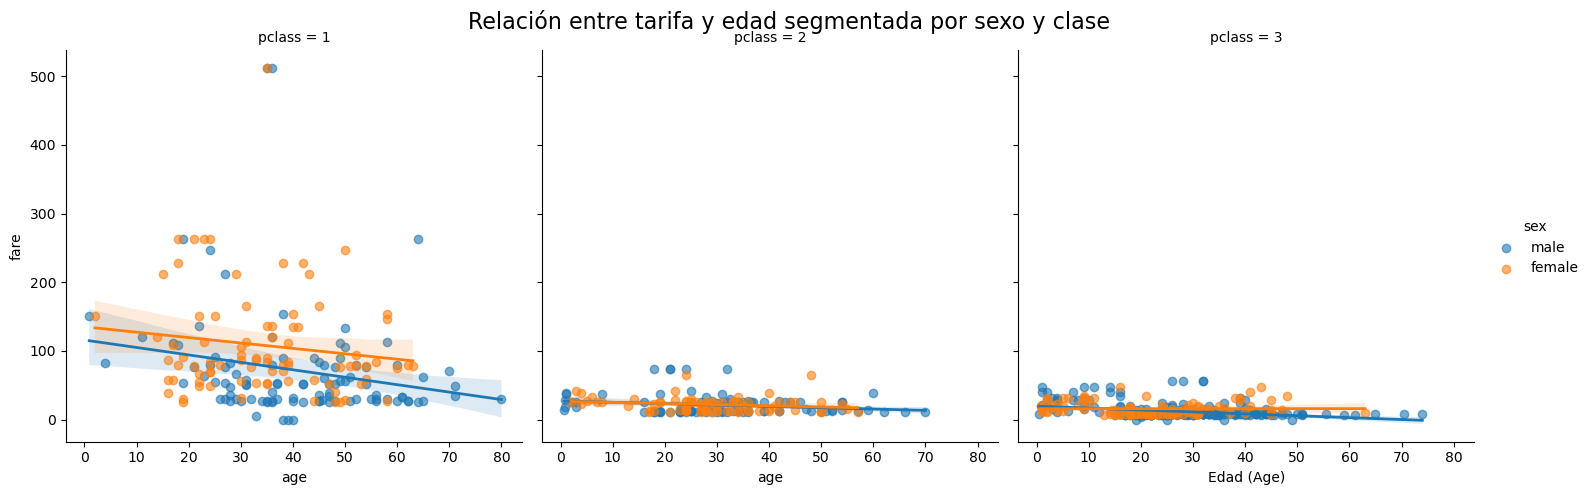

In [37]:
# gráfico de regresión segmentado por sexo y clase
sns.lmplot(
    data=titanic,
    x="age",
    y="fare",
    hue="sex",  # Diferenciación por sexo
    col="pclass",  # Facets por clase
    height=5,
    aspect=1,  # Relación ancho/alto
    scatter_kws={"alpha": 0.6},  # Transparencia para los puntos
    line_kws={"linewidth": 2},  # Grosor de la línea de regresión
    ci=95  # Intervalo de confianza del 95%
)

# Personalización del gráfico
plt.subplots_adjust(top=0.9)  # Ajuste para espacio del título principal
plt.suptitle("Relación entre tarifa y edad segmentada por sexo y clase", fontsize=16)
plt.xlabel("Edad (Age)")
plt.ylabel("Tarifa (Fare)")

plt.show()


#### Con titanic2 (edades null=28(mediana))

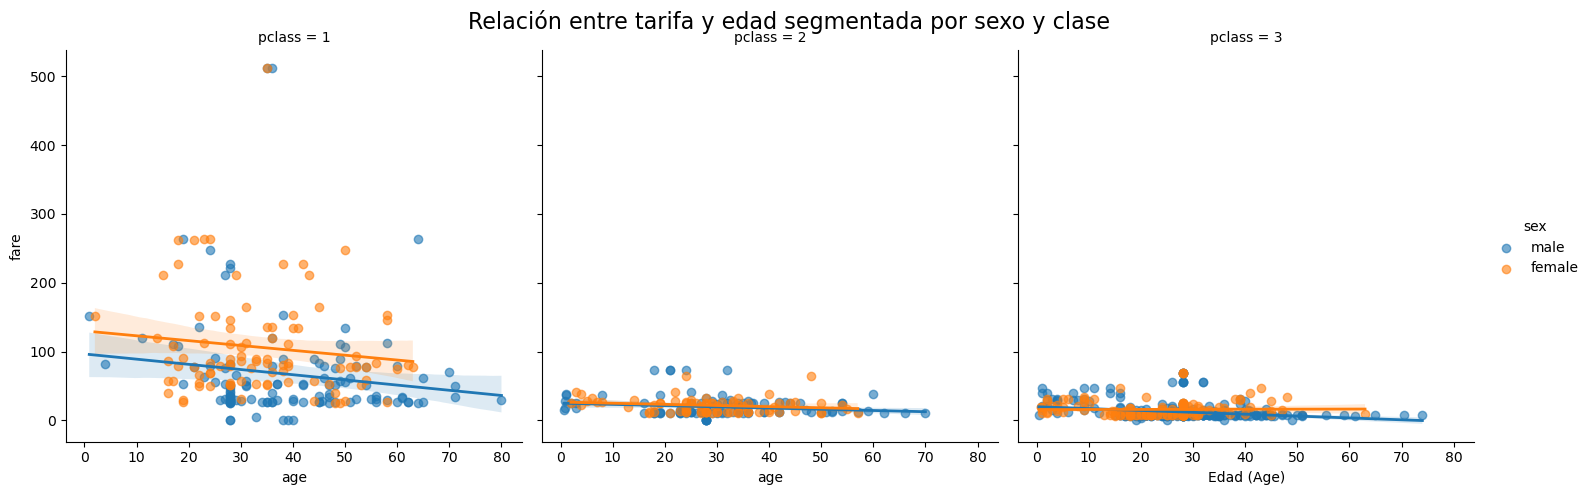

In [38]:
# gráfico de regresión segmentado por sexo y clase
sns.lmplot(
    data=titanic2,
    x="age",
    y="fare",
    hue="sex",  # Diferenciación por sexo
    col="pclass",  # Facets por clase
    height=5,
    aspect=1,  # Relación ancho/alto
    scatter_kws={"alpha": 0.6},  # Transparencia para los puntos
    line_kws={"linewidth": 2},  # Grosor de la línea de regresión
    ci=95  # Intervalo de confianza del 95%
)

# Personalización del gráfico
plt.subplots_adjust(top=0.9)  # Ajuste para espacio del título principal
plt.suptitle("Relación entre tarifa y edad segmentada por sexo y clase", fontsize=16)
plt.xlabel("Edad (Age)")
plt.ylabel("Tarifa (Fare)")

plt.show()
